In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

# 导入（外部data参照+考察）

# EDA（可视化+考察）

## 数据前处理

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data_call = pd.read_csv('/content/drive/My Drive/GCI2023/00最终/AirREGI/regi_call_data_transform.csv')
data_acc = pd.read_csv('/content/drive/My Drive/GCI2023/00最终/AirREGI/regi_acc_get_data_transform.csv')
data_cm = pd.read_csv('/content/drive/My Drive/GCI2023/00最终/AirREGI/cm_data.csv')
data_gt = pd.read_csv('/content/drive/My Drive/GCI2023/00最终/AirREGI/gt_service_name.csv')
data_calender = pd.read_csv('/content/drive/My Drive/GCI2023/00最终/AirREGI/calender_data.csv')

In [4]:
#merge data
data1 = pd.merge(data_calender, data_call, how='outer', on='cdr_date')
data2 = pd.merge(data1, data_acc, how='outer', on='cdr_date')
data3 = pd.merge(data2, data_cm, how='outer', on='cdr_date')
data_gt['cdr_date'] = data_gt['week']
data4 = pd.merge(data3, data_gt, how='outer', on='cdr_date')

In [5]:
#处理：删除列，转成01
#data：2018.06.01-2020.03.31
data4 = data4[data4['cdr_date'] >= '2018-06-01']
data4.drop(['dow_name','holiday_name'],axis=1,inplace=True)
data4['day_before_holiday_flag'] = data4['day_before_holiday_flag'].astype(int)
data4['holiday_flag'] = data4['holiday_flag'].astype(int)

In [19]:
data4

,cdr_date,dow,woy,wom,doy,financial_year,day_before_holiday_flag,holiday_flag,call_num,acc_get_cnt,cm_flg,week,search_cnt,year,month,week1
0,2018-06-01,5.0,22.0,1.0,152.0,2018.0,1,0,183.0,-0.282652,0,NaN,NaN,18,18.06,18.22
1,2018-06-02,6.0,22.0,1.0,153.0,2018.0,1,1,0.0,-1.025720,0,NaN,NaN,18,18.06,18.22
2,2018-06-03,7.0,22.0,2.0,154.0,2018.0,0,1,0.0,-1.075258,0,2018-06-03,18.0,18,18.06,18.22
3,2018-06-04,1.0,23.0,2.0,155.0,2018.0,0,0,213.0,-0.220730,0,NaN,NaN,18,18.06,18.23
4,2018-06-05,2.0,23.0,2.0,156.0,2018.0,0,0,143.0,-0.431266,0,NaN,NaN,18,18.06,18.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
665,2020-03-27,5.0,13.0,4.0,87.0,2019.0,1,0,127.0,0.534723,1,NaN,NaN,20,20.03,20.13
666,2020-03-28,6.0,13.0,4.0,88.0,2019.0,1,1,0.0,-0.220730,1,NaN,NaN,20,20.03,20.13
667,2020-03-29,7.0,13.0,5.0,89.0,2019.0,0,1,0.0,-0.641802,1,2020-03-29,20.0,20,20.03,20.13
668,2020-03-30,1.0,14.0,5.0,90.0,2019.0,0,0,134.0,-0.307421,1,NaN,NaN,20,20.03,20.14


## 可视化：画图

In [20]:
##创建月份列month，18.06
data4['cdr_date'] = pd.to_datetime(data4['cdr_date'])
data4['year'] = data4['cdr_date'].dt.strftime('%y')
data4['month'] = data4['cdr_date'].dt.strftime('%m')
data4['month'] = data4['year'] + '.' + data4['month']

In [21]:
##创建星期列week,18.152
data4['year'] = data4['year'].astype(str)
data4['woy'] = data4['woy'].astype(str)

data4['week1'] = data4['year'] + '.' + data4['woy'].astype(float).astype(str).apply(lambda x: re.sub(r'\.0$', '', x)).str.pad(width=2, side='left', fillchar='0')

In [22]:
##每个月求和 df_m
df_m_call = data4.groupby('month')['call_num'].sum().reset_index() #每月call_num总和
df_m_acc = data4.groupby('month')['acc_get_cnt'].sum().reset_index()
df_m_cm = data4.groupby('month')['cm_flg'].sum().reset_index()

df_m_cnt = data4[['month','search_cnt']]
df_m_cnt.dropna()
df_m_cnt = df_m_cnt.groupby('month')['search_cnt'].sum().reset_index()

df_m = pd.DataFrame({'month':df_m_call['month'], 'call_num':df_m_call['call_num'], 'acc_get_cnt':df_m_acc['acc_get_cnt'], 'cm_flg':df_m_cm['cm_flg'], 'search_cnt':df_m_cnt['search_cnt']})

In [23]:
##每一周求和 df_w
df_w_call = data4.groupby('week1')['call_num'].sum().reset_index() #每月call_num总和
df_w_acc = data4.groupby('week1')['acc_get_cnt'].sum().reset_index()
df_w_cm = data4.groupby('week1')['cm_flg'].sum().reset_index()

df_w_cnt = data4[['week1','search_cnt']]

df_w = pd.merge(df_w_call, df_w_acc, on='week1')
df_w = pd.merge(df_w, df_w_cm, on='week1')
df_w = pd.merge(df_w, df_w_cnt, on='week1')

df_w = df_w.dropna()

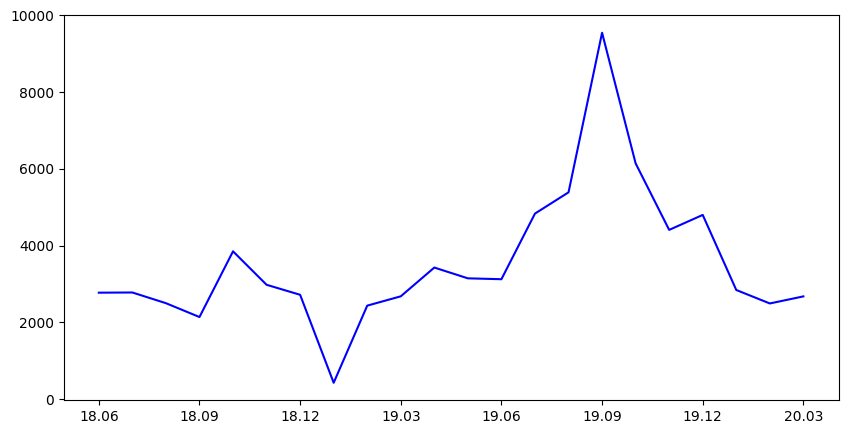

In [24]:
##每个月call_num总和 画图
plt.figure(figsize=(10, 5))
plt.plot(df_m['month'], df_m['call_num'], linestyle='-', color='blue')
plt.xticks(df_m['month'][::3])
plt.show()

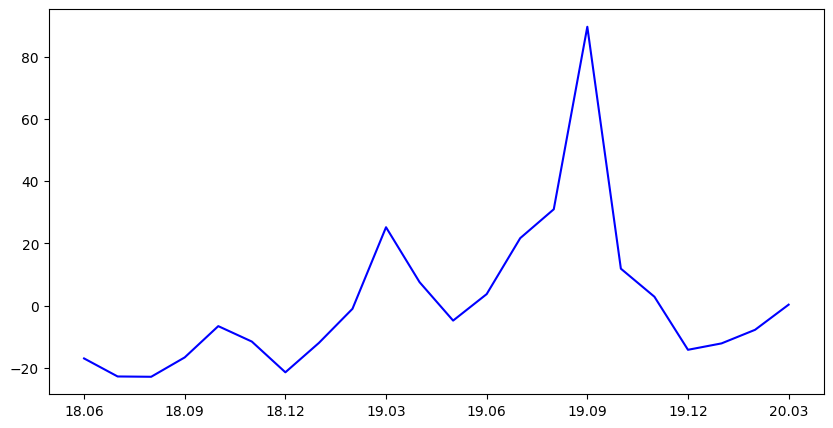

In [25]:
##每个月acc_get_cnt总和
plt.figure(figsize=(10, 5))
plt.plot(df_m['month'], df_m['acc_get_cnt'], linestyle='-', color='blue')
plt.xticks(df_m['month'][::3])
plt.show()

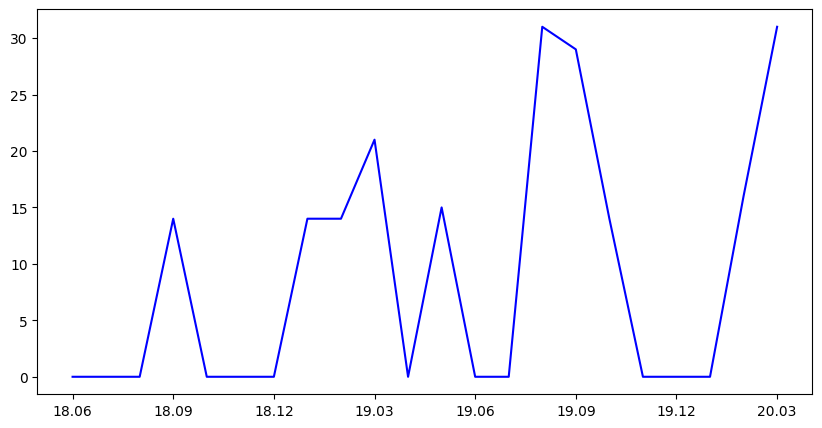

In [26]:
##每个月cm_flg总和
plt.figure(figsize=(10, 5))
plt.plot(df_m['month'], df_m['cm_flg'], linestyle='-', color='blue')
plt.xticks(df_m['month'][::3])
plt.show()

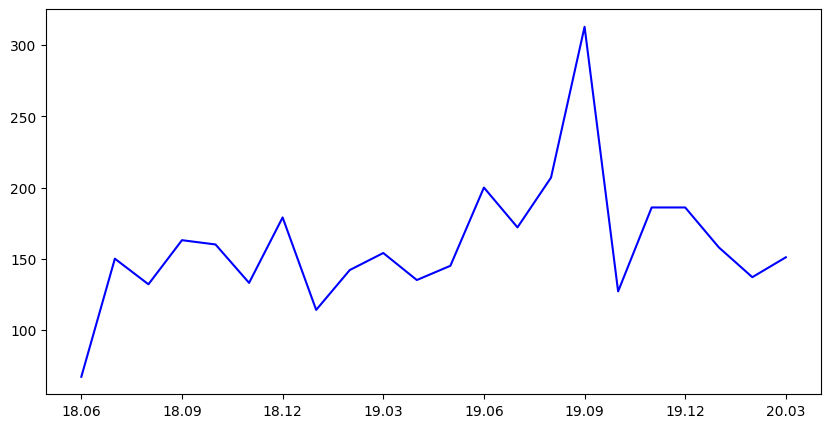

In [27]:
##每个月search_cnt总和
plt.figure(figsize=(10, 5))
plt.plot(df_m['month'], df_m['search_cnt'], linestyle='-', color='blue')
plt.xticks(df_m['month'][::3])
plt.show()

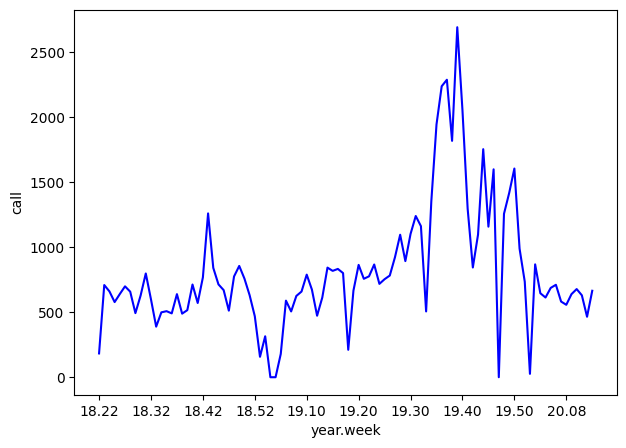

In [28]:
##每个周call_num总和
plt.figure(figsize=(7, 5))
plt.plot(df_w['week1'], df_w['call_num'], linestyle='-', color='blue')
plt.xticks(df_w['week1'][::10]) #横轴显示坐标：隔着10个
plt.xlabel('year.week')
plt.ylabel('call')
plt.show()

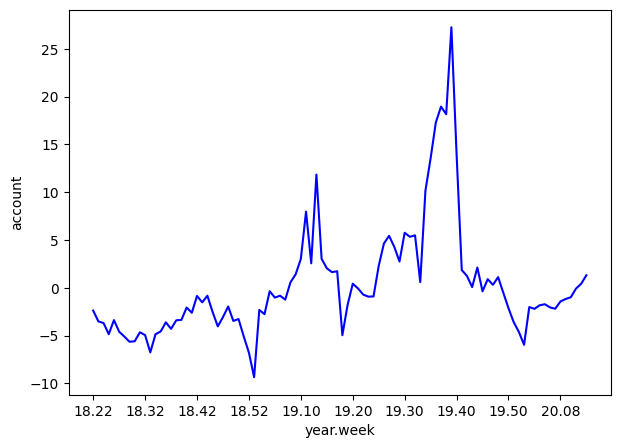

In [29]:
##每个周acc_get_cnt总和
plt.figure(figsize=(7, 5))
plt.plot(df_w['week1'], df_w['acc_get_cnt'], linestyle='-', color='blue')
plt.xticks(df_w['week1'][::10])
plt.xlabel('year.week')
plt.ylabel('account')
plt.show()

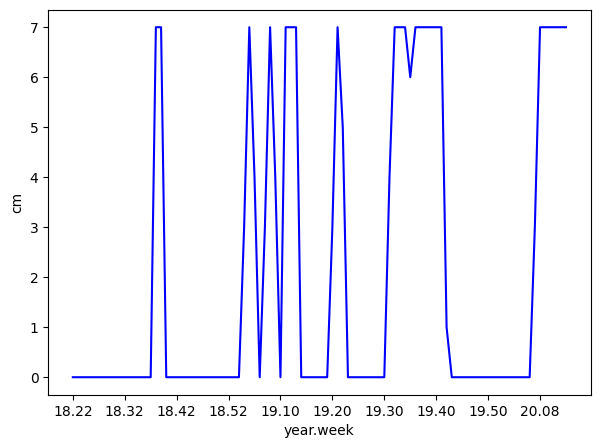

In [30]:
##每个周cm_flg总和
plt.figure(figsize=(7, 5))
plt.plot(df_w['week1'], df_w['cm_flg'], linestyle='-', color='blue')
plt.xticks(df_w['week1'][::10])
plt.xlabel('year.week')
plt.ylabel('cm')
plt.show()

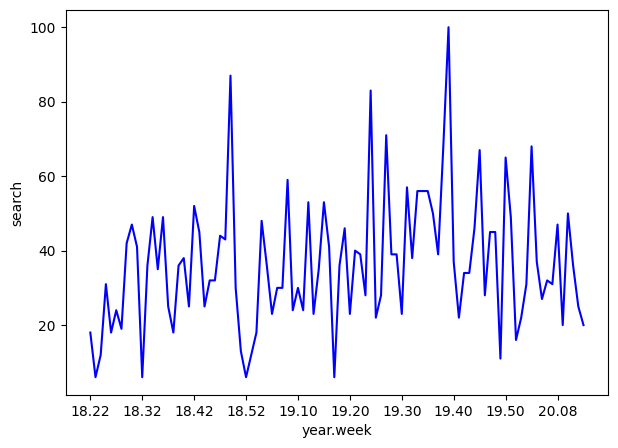

In [31]:
##每个周search_cnt总和
plt.figure(figsize=(7, 5))
plt.plot(df_w['week1'], df_w['search_cnt'], linestyle='-', color='blue')
plt.xticks(df_w['week1'][::10])
plt.xlabel('year.week')
plt.ylabel('search')
plt.show()

## 可视化：周期分解（STL）

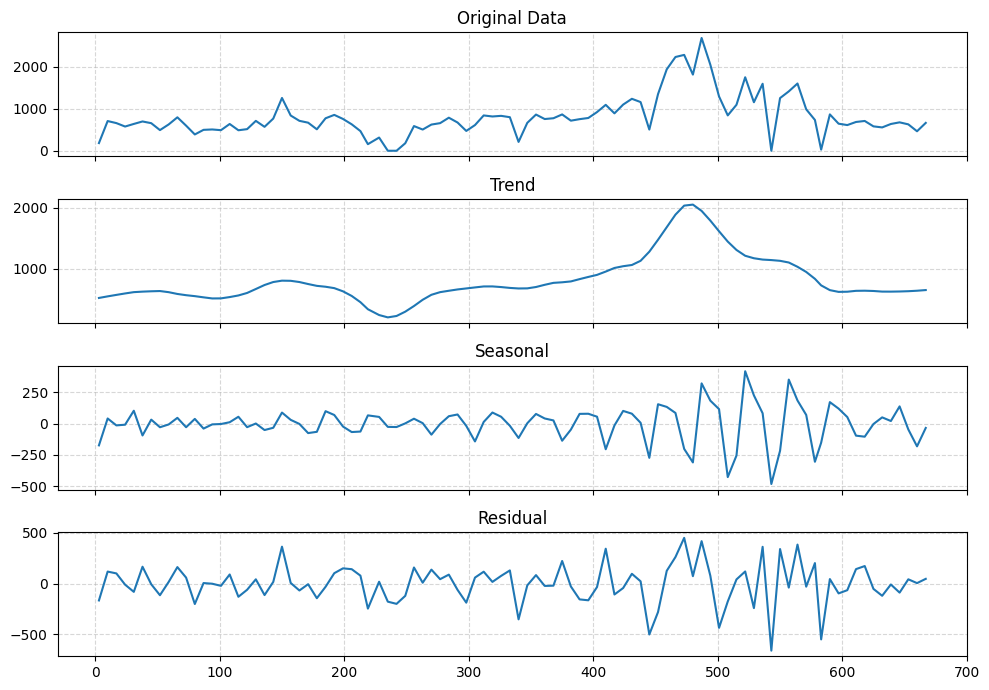

In [18]:
from statsmodels.tsa.seasonal import STL

# STL分解
stl = STL(df_w['call_num'], period=5) #周期长度为6
res = stl.fit() #stl拟合

#拟合结果：res.trend, res.seasonal, res.resid

# それぞれの成分を描画
fig, axes = plt.subplots(4, 1, figsize=(10, 7), sharex=True) #sharex:共享相同的x轴

df_w['call_num'].plot(ax=axes[0])
axes[0].grid(True, linestyle='--', alpha=0.5)
axes[0].set_title('Original Data')

res.trend.plot(ax=axes[1])
axes[1].grid(True, linestyle='--', alpha=0.5)
axes[1].set_title('Trend')

res.seasonal.plot(ax=axes[2])
axes[2].grid(True, linestyle='--', alpha=0.5)
axes[2].set_title('Seasonal')

res.resid.plot(ax=axes[3])
axes[3].grid(True, linestyle='--', alpha=0.5)
axes[3].set_title('Residual')

plt.tight_layout()
plt.show()

データの大枠の傾向」「周期的な変動」

trend:长期倾向:在一定程度上先上升后下降

季节性：具有一定的周期性，在多少周怎么怎么样，然后在什么时候，最大，有更大的影响


# 機械学習モデルを作成し、定量的な示唆を得ている

## 自己相关确认

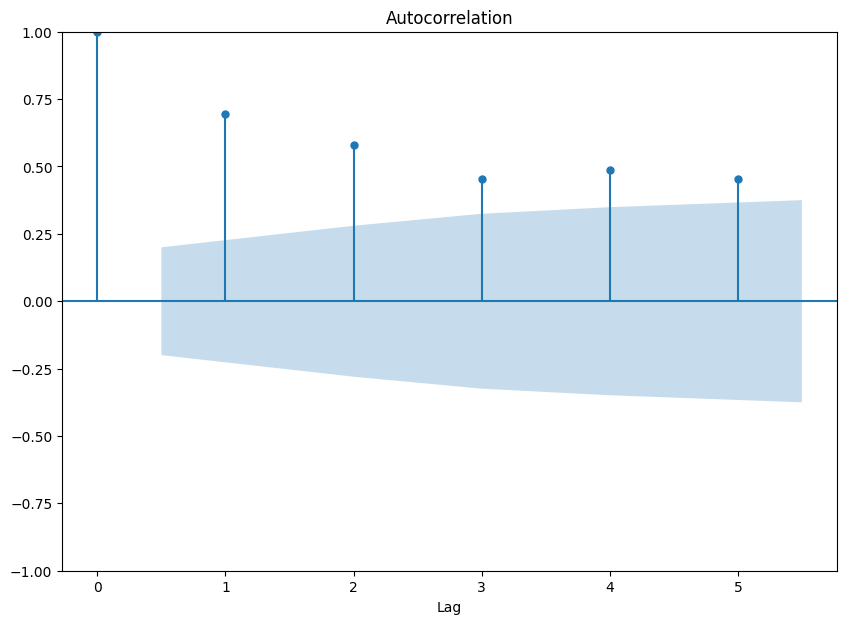

In [ ]:
#自己相関を計算・プロットするplot_acf関数をインポート
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 7))
#自己相関をプロット。lags=11と指定することによって、11年分(1周期分)の自己相関を計算 滞后11阶 k=11
plot_acf(df_w['call_num'], lags=5, ax = ax)
plt.xlabel('Lag')
plt.show()

自己相関係数がない」場合の信頼区間が青い範囲になります。青い範囲より外側にある点は、「その時差において、自己相関が存在する」と言えます

在周期长度为5时，存在自己相关

## 定常性

In [ ]:
#ADF検定を行うことができるモジュールをインポート 单位根检验
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(df_w['call_num'])

# 結果を表示
# print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
# print('臨界値\t:')
# for key, value in result[4].items():
#     print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。") #H0：时间序列不平稳
else:
    print("時系列データは定常であるとは言えません。")

p値	: 0.225098
時系列データは定常であるとは言えません。


定常性：在每个时间点，时序数据的期望值保持不变，自相关仅依赖于时间差异
所以用ARIMA模型

95


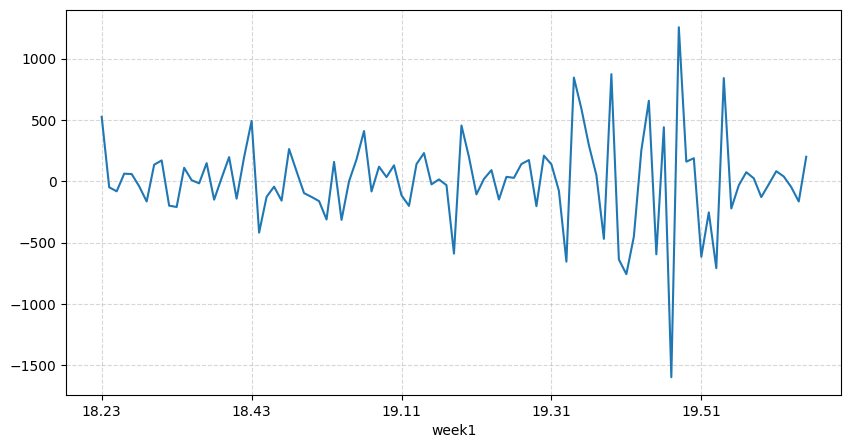

In [ ]:
##做个一阶差分
#隣り合う時点の差のデータを作成
call_1 = df_w['call_num'].diff().dropna()

#見やすいようにグラフの大きさを調整
plt.figure(figsize=(10, 5))

#表示
call_1.plot()

#長さを表示
print(len(call_1))
# グリッド線を追加
plt.grid(True, linestyle='--', alpha=0.5)

In [ ]:
##一阶差分满足定常性
#ADF検定を行うことができるモジュールをインポート
from statsmodels.tsa.stattools import adfuller

# ADF検定を実行
result = adfuller(call_1)

# 結果を表示
print('統計検定量\t: %f' % result[0])
print('p値\t: %f' % result[1])
print('臨界値\t:')
for key, value in result[4].items():
    print('\t%s\t: %.3f' % (key, value))

# p値を評価
if result[1] < 0.05:
    print("時系列データは定常であると考えられます。")
else:
    print("時系列データは定常であるとは言えません。")

統計検定量	: -8.631631
p値	: 0.000000
臨界値	:
	1%	: -3.504
	5%	: -2.894
	10%	: -2.584
時系列データは定常であると考えられます。


## 模型

In [ ]:
df_w.index=df_w['week1']

In [ ]:
##用AIC 過去の観測値と誤差項の適切な次数を選択
len_test = 10
train = df_w['call_num'][:-len_test]
test = df_w['call_num'][-len_test:]

In [ ]:
#このセルの実行には時間がかかります
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

import warnings
warnings.filterwarnings('ignore')

# まずはモデルのパラメータの範囲を設定します
max_ar = 12  # ARの最大次数
max_ma = 5 # MAの最大次数

# 最小AICを無限大で初期化します
best_aic = np.inf
best_order = None

# すべてのパラメータの組み合わせに対してモデルをフィットします
for p in range(max_ar+1):
    for q in range(max_ma+1):
        try:
            # モデルを作成
            # pが予測に用いる過去の観測値の数、qが予測に用いる過去の誤差項の数です
            tmp_mdl = ARIMA(train, order=(p, 1, q))
            result = tmp_mdl.fit()
            tmp_aic = result.aic
            # AICが小さい場合は、モデルとパラメータを更新します
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (p, q)
        except: continue

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))

aic: 1246.69333 | order: (5, 2)


([<matplotlib.axis.XTick at 0x7bfd4376ba00>,
 [Text(0.0, 0, '18.22'),
  Text(10.0, 0, '18.32'),
  Text(20.0, 0, '18.42'),
  Text(30.0, 0, '18.52'),
  Text(40.0, 0, '19.10'),
  Text(50.0, 0, '19.20'),
  Text(60.0, 0, '19.30'),
  Text(70.0, 0, '19.40'),
  Text(80.0, 0, '19.50'),
  Text(90.0, 0, '20.08')])

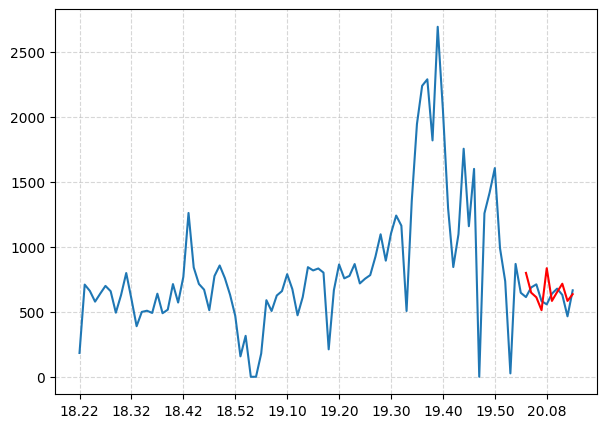

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

fig, ax = plt.subplots(figsize=(7, 5), dpi=100)
ax.grid(True, linestyle='--', alpha=0.5)

#AICにおいてグリッドサーチを行い得られた結果から、p = 12, q = 2としてARMAモデルにて予測を行います
#order=(12, 1, 3)における1は、一回差分を意味します
arma_model = ARIMA(train, order=(5, 1, 2))
result = arma_model.fit()
forecast = result.forecast(len_test)

#青線（デフォルト）で大元のデータを表示
ax.plot(df_w['call_num'], ls="-")
#赤線で予測結果を表示
ax.plot(forecast, ls="-", color="r", label="predicted")
plt.xticks(df_w.index[::10])

# 事業提案行っている

建立了模型，根据该模型可以看到得到每周call_num的预测值，根据该预测值进行人员变动。更有效地管理成本，可以更好地满足客户需求，提高客户体验

基于历史电话接听数据，可以进行趋势分析和预测，帮助组织更好地规划资源、制定预算和提前应对高峰期

下一步：可以寻找电话接听数与广告投放的关系，可以帮助优化广告和营销策略。组织可以根据预测结果调整广告投放时间和方式，以更好地吸引潜在客户。